In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
df = pd.read_csv('../../msd_full.csv')

In [3]:
df['duration'] = df['duration'] * 1000

In [4]:
df.head()

,title,year,popularity,duration,danceability,energy,key,loudness,mode,tempo,signature
0,b'Picnic (P\xc3\xa5 Kastellet) LIVE',2005,0.345802,247326.89,0.0,0.0,2,-5.347,1,88.750,4
1,b'Jesus Will Never Change (Live)',0,0.229144,403121.18,0.0,0.0,10,-10.044,1,130.341,5
2,b'Kaoz',0,0.323112,376267.30,0.0,0.0,10,-11.059,0,126.501,1
3,b'Soutoukou',2003,NaN,437367.71,0.0,0.0,5,-22.402,1,97.837,3
4,b'Have Fun Storming The Castle',2008,0.597109,201873.83,0.0,0.0,7,-3.647,1,179.890,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   title         1000000 non-null  object 
 1   year          1000000 non-null  int64  
 2   popularity    581965 non-null   float64
 3   duration      1000000 non-null  float64
 4   danceability  1000000 non-null  float64
 5   energy        1000000 non-null  float64
 6   key           1000000 non-null  int64  
 7   loudness      1000000 non-null  float64
 8   mode          1000000 non-null  int64  
 9   tempo         1000000 non-null  float64
 10  signature     1000000 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 83.9+ MB


In [6]:
df.describe()

,year,popularity,duration,danceability,energy,key,loudness,mode,tempo,signature
count,1000000.000000,581965.000000,1.000000e+06,1000000.0,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1030.325652,0.356051,2.495008e+05,0.0,0.0,5.321964,-10.124039,0.666408,123.889218,3.593947
std,998.745002,0.234441,1.262296e+05,0.0,0.0,3.601595,5.197245,0.471496,35.055981,1.221925
min,0.000000,0.000000,3.130200e+02,0.0,0.0,0.000000,-58.178000,0.000000,0.000000,0.000000
25%,0.000000,0.215080,1.807408e+05,0.0,0.0,2.000000,-12.672000,0.000000,97.995000,3.000000
50%,1969.000000,0.377532,2.288583e+05,0.0,0.0,5.000000,-8.963000,1.000000,122.086000,4.000000
75%,2002.000000,0.531985,2.899326e+05,0.0,0.0,9.000000,-6.386000,1.000000,144.089000,4.000000
max,2011.000000,1.000000,3.034906e+06,0.0,0.0,11.000000,4.318000,1.000000,302.300000,7.000000


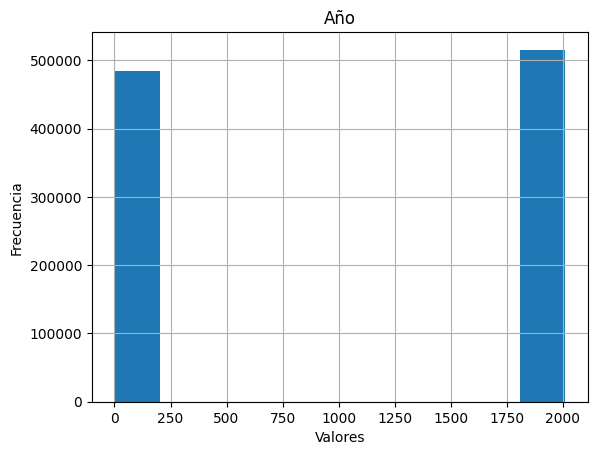

484424


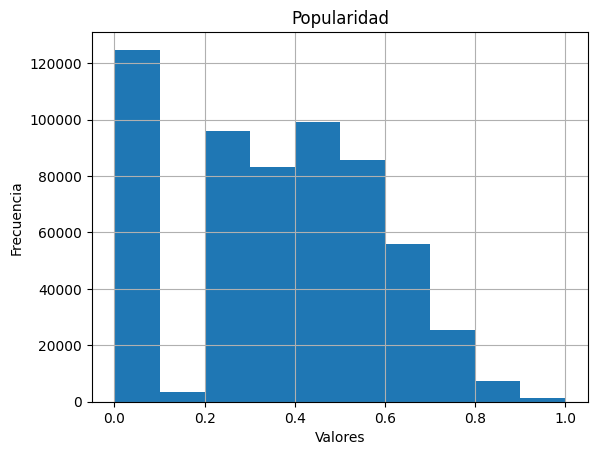

124760


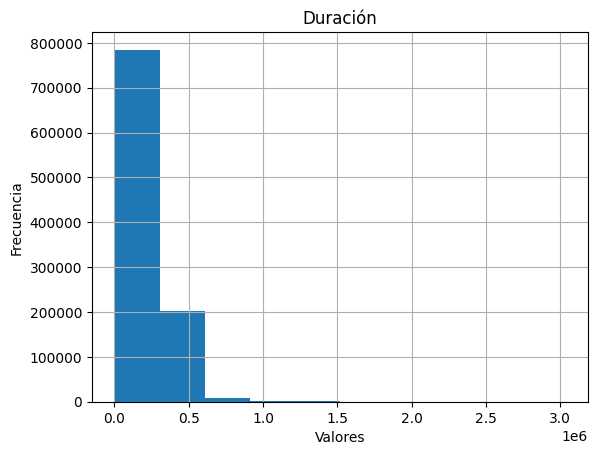

0


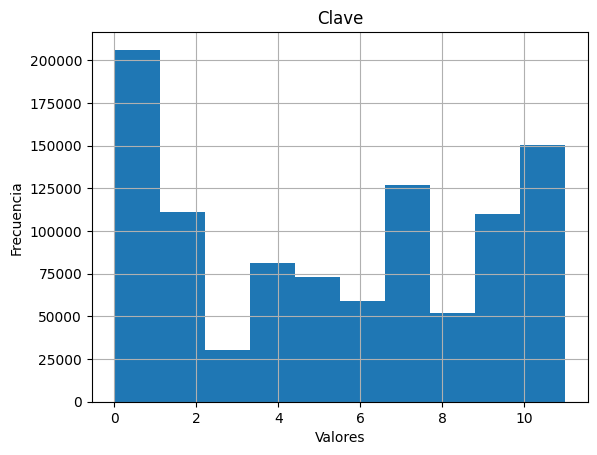

122237


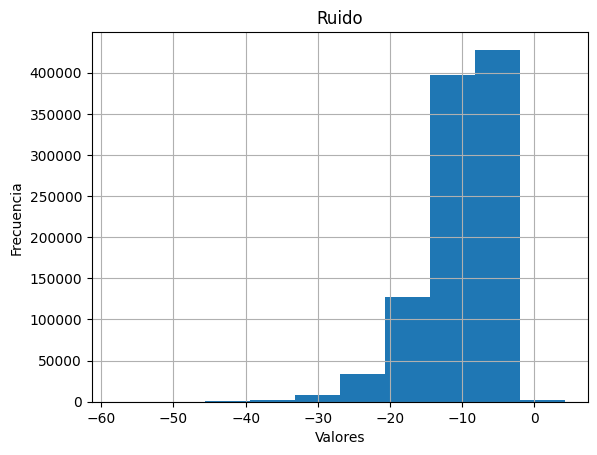

0


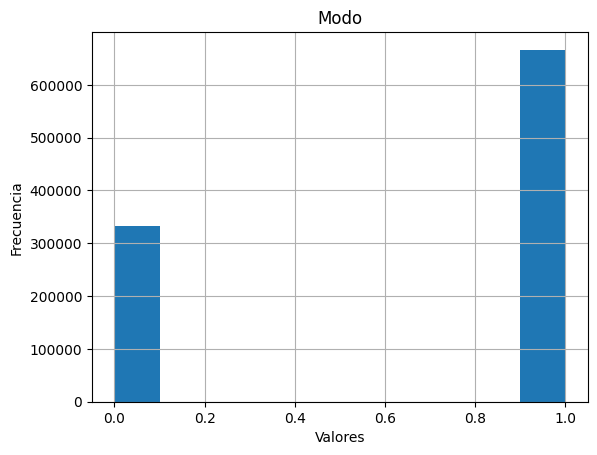

333592


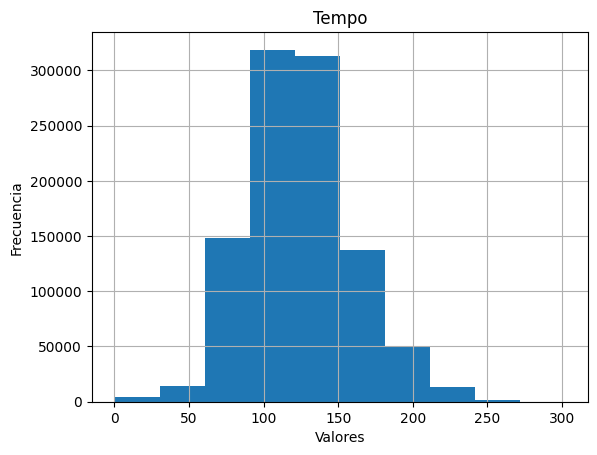

3230


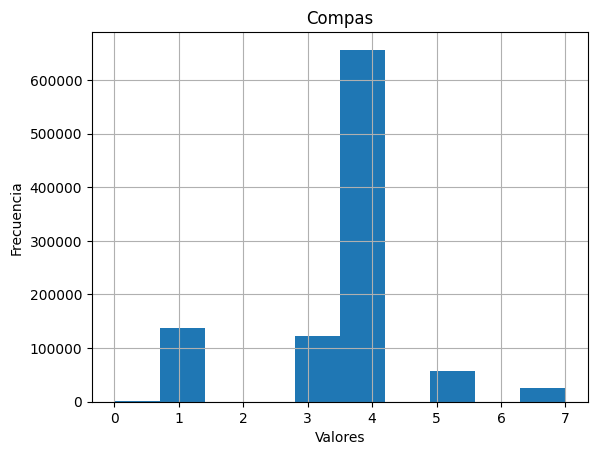

619


In [7]:
df['year'].hist()
plt.title('Año')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()
print((df['year'] == 0).sum())

df['popularity'].hist()
plt.title('Popularidad')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()
print((df['popularity'] == 0).sum())

df['duration'].hist()
plt.title('Duración')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()
print((df['duration'] == 0).sum())

df['key'].hist()
plt.title('Clave')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()
print((df['key'] == 0).sum())

df['loudness'].hist()
plt.title('Ruido')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()
print((df['loudness'] == 0).sum())

df['mode'].hist()
plt.title('Modo')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()
print((df['mode'] == 0).sum())

df['tempo'].hist()
plt.title('Tempo')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()
print((df['tempo'] == 0).sum())

df['signature'].hist()
plt.title('Compas')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()
print((df['signature'] == 0).sum())

## Drop valores en cero

In [8]:
df = df[df['year'] != 0]
df = df[df['popularity'] != 0]
df = df[df['tempo'] != 0]

df = df.dropna()

df.describe()


,year,popularity,duration,danceability,energy,key,loudness,mode,tempo,signature
count,305723.000000,305723.000000,3.057230e+05,305723.0,305723.0,305723.000000,305723.000000,305723.000000,305723.000000,305723.000000
mean,1999.737547,0.487243,2.457375e+05,0.0,0.0,5.313025,-9.285021,0.659924,125.693808,3.639275
std,9.726383,0.156769,1.099194e+05,0.0,0.0,3.594055,4.785959,0.473735,34.522340,1.177538
min,1922.000000,0.187701,2.690160e+03,0.0,0.0,0.000000,-52.559000,0.000000,7.971000,1.000000
25%,1996.000000,0.372530,1.859914e+05,0.0,0.0,2.000000,-11.633000,0.000000,99.482000,4.000000
50%,2003.000000,0.485761,2.310265e+05,0.0,0.0,5.000000,-8.195000,1.000000,122.736000,4.000000
75%,2007.000000,0.597816,2.843685e+05,0.0,0.0,9.000000,-5.850000,1.000000,146.588000,4.000000
max,2011.000000,1.000000,3.007738e+06,0.0,0.0,11.000000,3.966000,1.000000,280.955000,7.000000


In [9]:
print((df['tempo'] == 0).sum())

0


# Popularidad

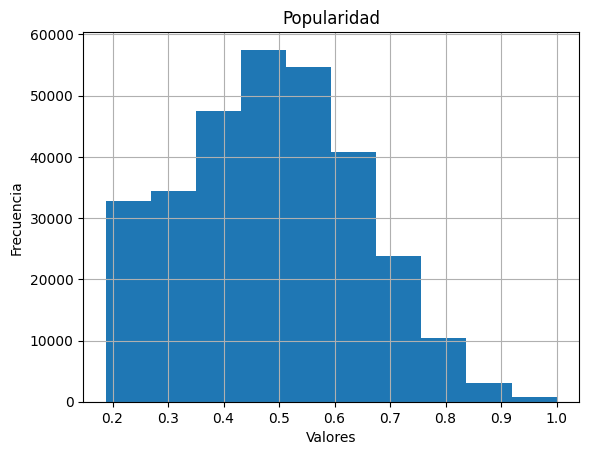

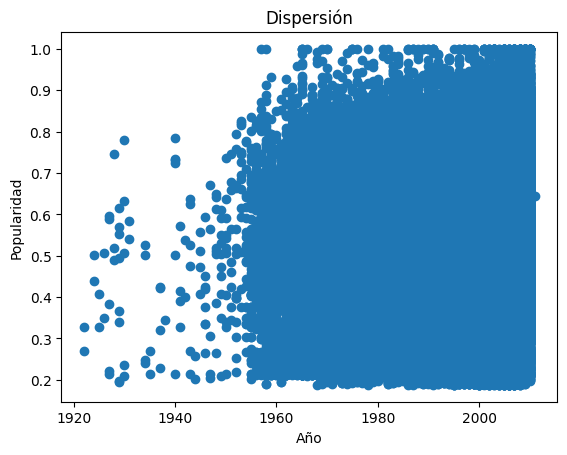

In [10]:
df['popularity'].hist()
plt.title('Popularidad')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

plt.scatter(df['year'], df['popularity'])
plt.title('Dispersión')
plt.xlabel('Año')
plt.ylabel('Popularidad')
plt.show()

# Duración

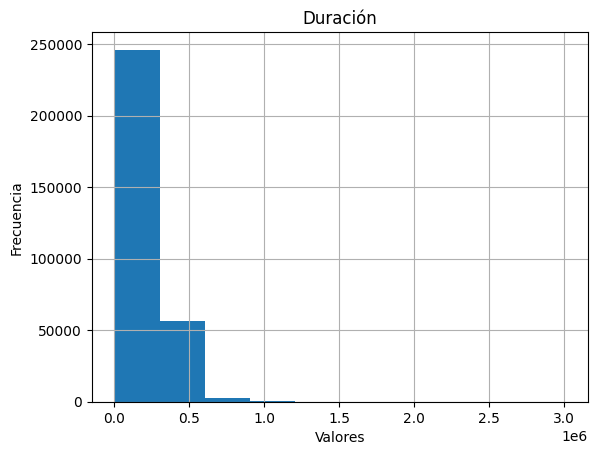

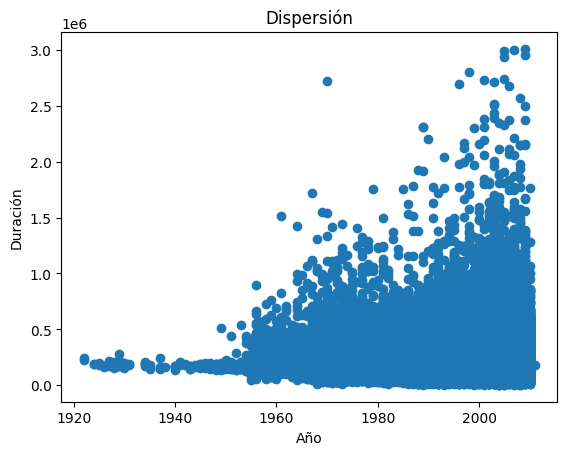

In [11]:
df['duration'].hist()
plt.title('Duración')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

plt.scatter(df['year'], df['duration'])
plt.title('Dispersión')
plt.xlabel('Año')
plt.ylabel('Duración')
plt.show()

# Clave

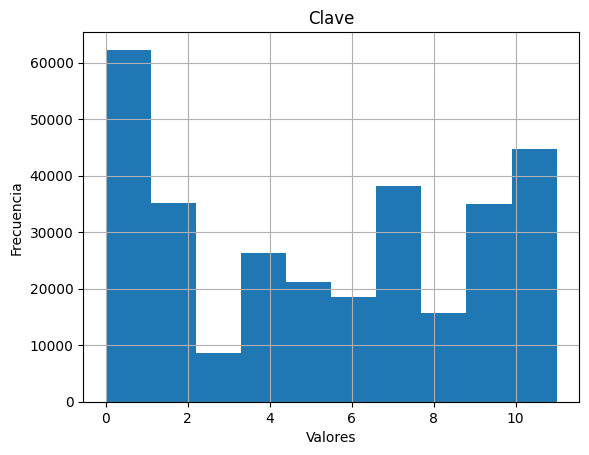

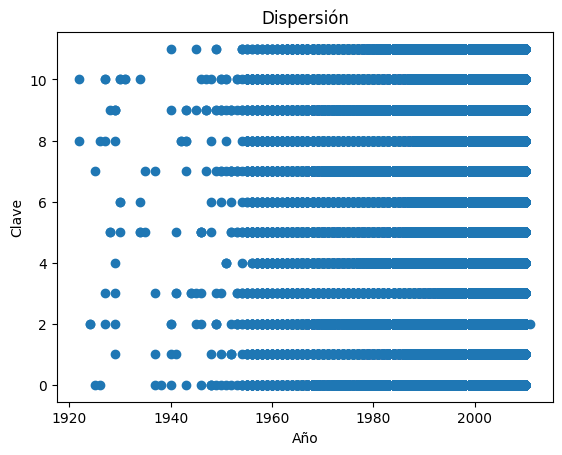

In [12]:
df['key'].hist()
plt.title('Clave')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

plt.scatter(df['year'], df['key'])
plt.title('Dispersión')
plt.xlabel('Año')
plt.ylabel('Clave')
plt.show()

# Ruido

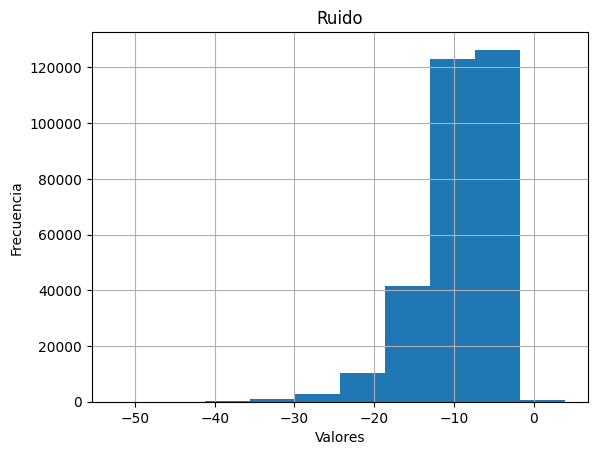

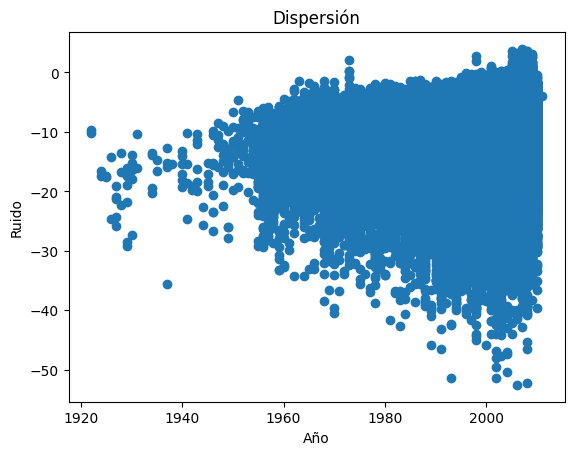

In [13]:
df['loudness'].hist()
plt.title('Ruido')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

plt.scatter(df['year'], df['loudness'])
plt.title('Dispersión')
plt.xlabel('Año')
plt.ylabel('Ruido')
plt.show()

# Modo

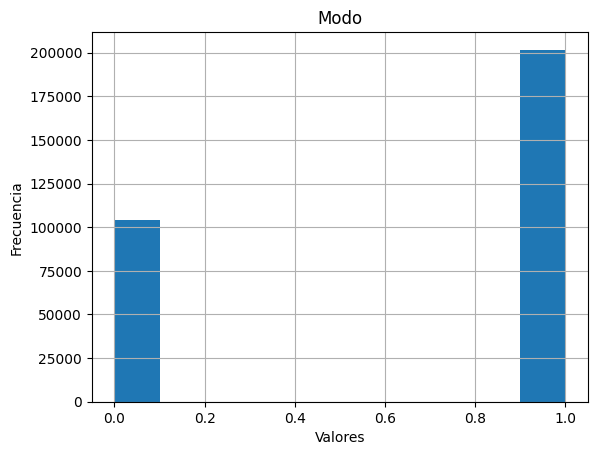

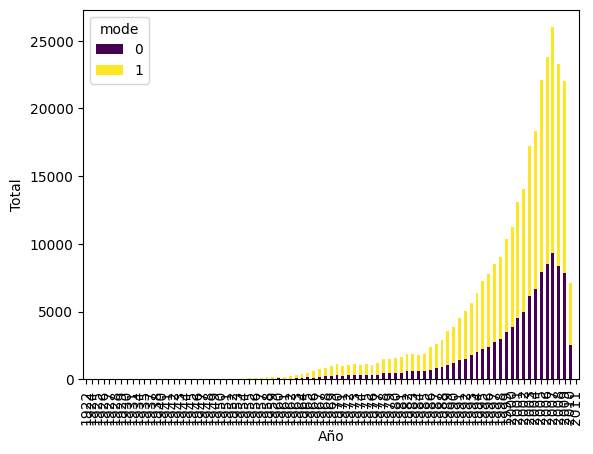

In [14]:
df['mode'].hist()
plt.title('Modo')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

df.groupby(['year', 'mode']).size().unstack(fill_value=0).plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Año')
plt.ylabel('Total')
plt.show()

# Tempo

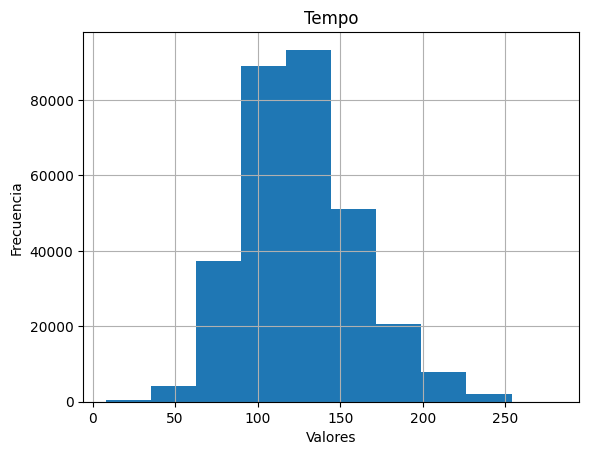

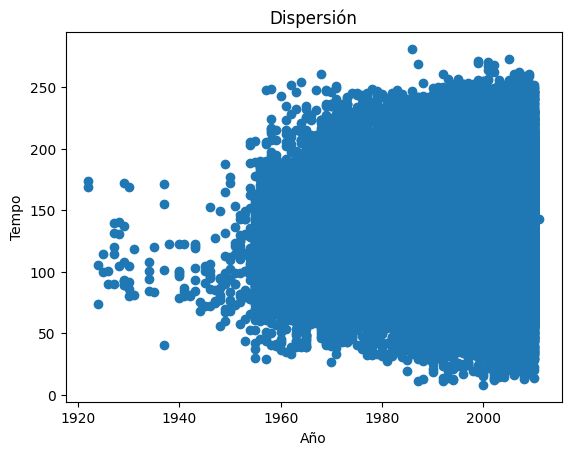

In [15]:
df['tempo'].hist()
plt.title('Tempo')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

plt.scatter(df['year'], df['tempo'])
plt.title('Dispersión')
plt.xlabel('Año')
plt.ylabel('Tempo')
plt.show()

# Compas

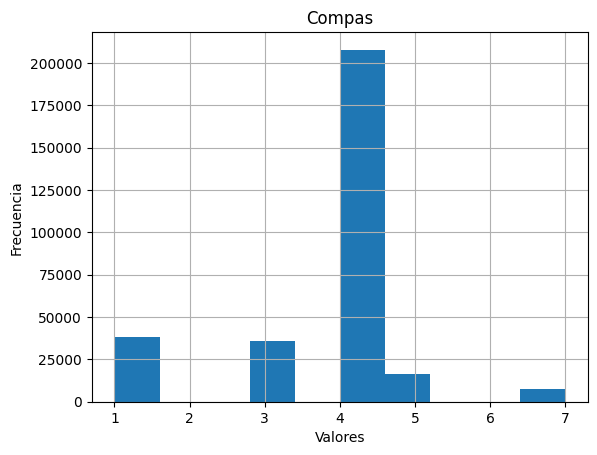

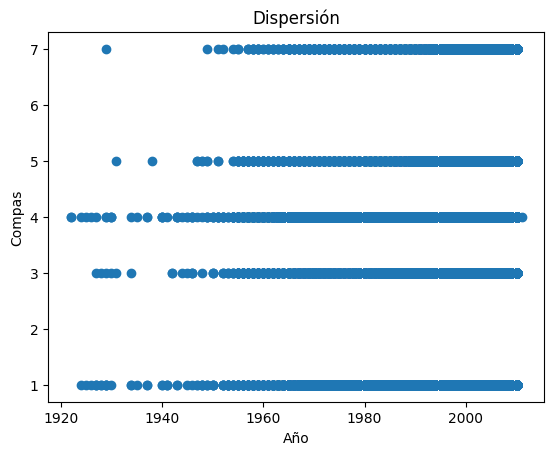

In [16]:
df['signature'].hist()
plt.title('Compas')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

plt.scatter(df['year'], df['signature'])
plt.title('Dispersión')
plt.xlabel('Año')
plt.ylabel('Compas')
plt.show()

# Correlación

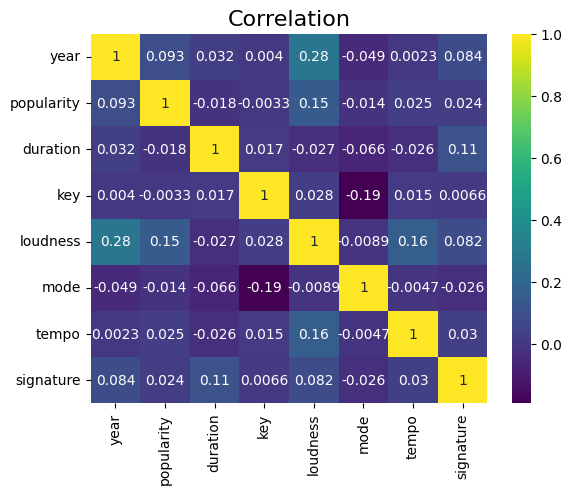

In [17]:
df_cor = df.drop(columns=['title', 'danceability', 'energy'])

heatmap = sns.heatmap(df_cor.corr(), cmap='viridis', annot=True)
heatmap.set_title('Correlation', fontsize=16)
plt.show()

# Dependencia de variables

In [18]:
x = df[['year', 'duration', 'key', 'loudness', 'mode', 'tempo', 'signature']]
y = df['popularity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

ml = LinearRegression()

ml.fit(x_train, y_train)

LinearRegression()

In [19]:
coeficientes = ml.coef_
intercepto = ml.intercept_
print(f"Coeficientes: {coeficientes}")
print(f"Intercepto: {intercepto}")

Coeficientes: [ 9.00756007e-04 -2.36499050e-08 -3.57694283e-04  4.24772294e-03
 -4.45270721e-03  1.35143068e-05  1.16903728e-03]
Intercepto: -1.2702698174876716


In [20]:
# Añadir una constante para el término de intersección
X_con_const = sm.add_constant(x)

# Ajustar el modelo usando statsmodels
modelo_stats = sm.OLS(y, X_con_const).fit()

In [21]:
print(modelo_stats.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1114.
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:02:43   Log-Likelihood:             1.3655e+05
No. Observations:              305723   AIC:                        -2.731e+05
Df Residuals:                  305715   BIC:                        -2.730e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2958      0.060    -21.468      0.0